# Sumário

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv('data/anuncios.csv')
print(df.shape)
df.head()

(400, 3)


,idade,salario,comprou
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
x, y = df.idade.values.reshape(-1,1), df.comprou.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 1) (400, 1)


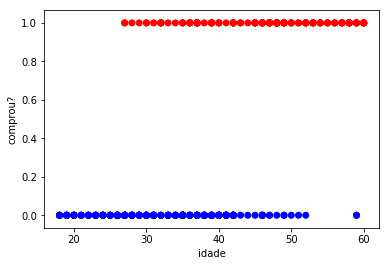

In [4]:
plt.scatter(x, y, c=y, cmap='bwr')
plt.xlabel('idade')
plt.ylabel('comprou?')

In [5]:
std = StandardScaler()
x = std.fit_transform(x.astype(np.float64))

In [6]:
reg = LogisticRegression()
reg.fit(x, y.ravel())

print(reg.coef_, reg.intercept_)
print(reg.score(x, y))

[[ 1.89603484]] [-0.89228535]
0.84


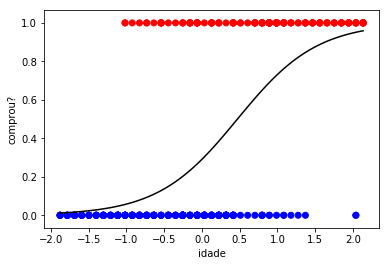

In [7]:
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
x_ = reg.predict_proba(x_test)

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x_test, x_[:,1], color='black')
plt.xlabel('idade')
plt.ylabel('comprou?')

In [8]:
def sigmoid(x, derivative=False):
    if derivative:
        y = sigmoid(x)
        return y*(1-y)
    else:
        return 1.0/(1.0 + np.exp(-x))

## Numpy 

In [75]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1x1]
b = 2*np.random.random()-1       # [1x1]

for step in range(101):
    z = np.dot(x, w.T) + b # [400x1]
    y_pred = sigmoid(z)    # [400x1]
    error = y - y_pred  # [400x1]
    dydz = error*y_pred*(1-y_pred)
    w = w + 0.01*np.dot(dydz.T, x)
    b = b + 0.01*dydz.sum()
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, np.sum(error)))

print('w: ', w)
print('b: ', b)

step 0: -70.35255788759562
step 10: -13.069412505224053
step 20: -5.817838233054914
step 30: -2.49036192029528
step 40: -0.5317607551108008
step 50: 0.7733898949502382
step 60: 1.709986190540472
step 70: 2.415323070411623
step 80: 2.964533713509087
step 90: 3.4026509628081976
step 100: 3.758560028197927
w:  [[ 2.04694407]]
b:  -1.01901364043


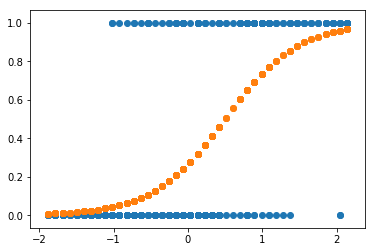

In [65]:
plt.scatter(x, y)
plt.scatter(x, y_pred, cmap='red')

In [ ]:
z.min(), z.max()

In [ ]:
y_pred.min(), y_pred.max()

## Keras

## Tensorflow